<a href="https://colab.research.google.com/github/suhanask/Assignments_ExcelR_Suhana/blob/main/RandomForest_company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [2]:
company=pd.read_csv("Company_Data.csv")
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [4]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

<Axes: ylabel='Sales'>

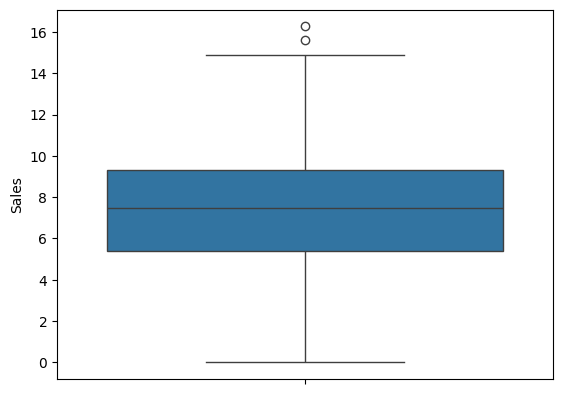

In [6]:
sns.boxplot(company["Sales"])

In [7]:
def split(num):
    if num < 5:
        return "low sale"
    elif num>= 5 and num<10:
        return "average sale"
    else:
        return "high sale"

company.Sales=company.Sales.apply(split)

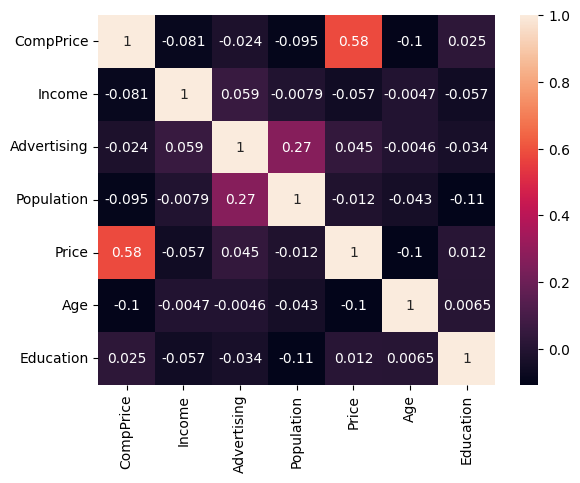

In [8]:
company1 = company.select_dtypes(include=[np.number])
corr = company1.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [9]:
le=LabelEncoder()

In [10]:
company["ShelveLoc"]=le.fit_transform(company["ShelveLoc"])
company["Urban"]=le.fit_transform(company["Urban"])
company["US"]=le.fit_transform(company["US"])

In [12]:
x=company.iloc[:,1:11]
y=company.iloc[:,0]

In [13]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [14]:
y

0      average sale
1         high sale
2         high sale
3      average sale
4          low sale
           ...     
395       high sale
396    average sale
397    average sale
398    average sale
399    average sale
Name: Sales, Length: 400, dtype: object

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [16]:
rf=RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=15,criterion="entropy")
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [17]:
preds=rf.predict(x_test)

In [18]:
confusion_matrix(y_test,preds)

array([[45,  5,  7],
       [ 5,  8,  0],
       [ 7,  0,  3]])

In [19]:
accuracy_score(y_test,preds)

0.7

In [20]:
pd.Series(preds).value_counts()

average sale    57
high sale       13
low sale        10
Name: count, dtype: int64

In [21]:
df=pd.DataFrame({"actual":y_test,"predicted":preds})
df

,actual,predicted
228,average sale,low sale
383,average sale,average sale
263,average sale,average sale
35,high sale,average sale
249,average sale,low sale
...,...,...
68,high sale,high sale
364,high sale,high sale
312,average sale,low sale
273,high sale,average sale


In [22]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

average sale       0.79      0.79      0.79        57
   high sale       0.62      0.62      0.62        13
    low sale       0.30      0.30      0.30        10

    accuracy                           0.70        80
   macro avg       0.57      0.57      0.57        80
weighted avg       0.70      0.70      0.70        80

